<a href="https://colab.research.google.com/github/109810022/bloodvessel-image/blob/main/02_Precision_Recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Package

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Define Function 

In [ ]:
def show(img_,text):
    print(text,img_.shape,np.amin(img_),np.amax(img_),img_.dtype)
    # plt.figure(figsize=(8,8))
    plt.imshow(img_)
    plt.title(text,fontsize=20)
    plt.xlabel(str(img_.shape))
    plt.ylabel(str(np.amin(img_))+' ~ '+str(np.amax(img_)))
    return

In [ ]:
def precision_recall_f1(label,pred):
    pr_image = np.zeros((512,512,3))
    TP,FP,FN = 0,0,0
    for i in range(512):
        for j in range(512):
            if label[i,j] ==1 and pred[i,j] ==1:
                pr_image[i,j] = (255,255,255)
                TP +=1
            elif label[i,j] ==0 and pred[i,j] ==1:
                pr_image[i,j] = (0,255,0)
                FP +=1
            elif label[i,j] ==1 and pred[i,j] ==0:
                pr_image[i,j] = (255,0,0)
                FN +=1
            
    plt.imshow(pr_image.astype('uint8'))
    plt.axis('off')
    th_precision = TP/(TP+FP)
    th_recall =TP/(TP+FN)
    th_f1 = 2*((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN)))

    return th_precision,th_recall,th_f1

Read Label

label Mask (512, 512) 0 1 uint16


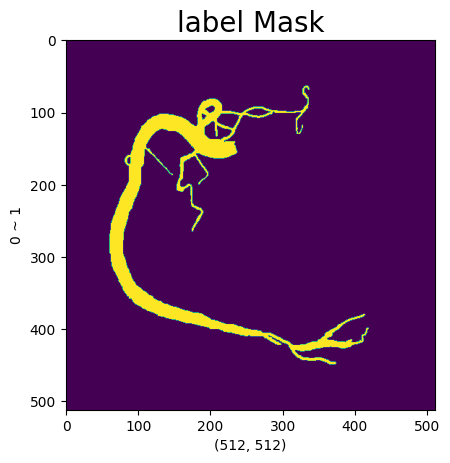

In [ ]:
raw_mask = cv2.imread('/content/CVAI-0113_RCA_LAO56_CRA1_27_Label.png',flags=cv2.IMREAD_UNCHANGED)
show(raw_mask,'label Mask')

Read Test Image

test Mask (512, 512, 3) 0 253 uint8
test Mask (512, 512) 0.0 0.9921568627450981 float64
test Mask (512, 512) 0.0 1.0 float64


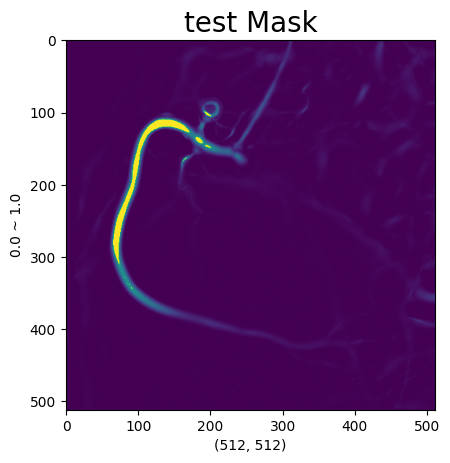

In [ ]:
pred_image = cv2.imread('/content/test_pred_img.jpg')
show(pred_image,'test Mask')
pred_mask = cv2.cvtColor(pred_image,cv2.COLOR_BGR2GRAY)
# # raw_mask = raw_mask.astype(np.float32)
pred_mask = pred_mask/255
show(pred_mask,'test Mask')
# # raw_mask = raw_mask.astype(np.uint8)
pred_mask[pred_mask>=0.5] = 1
pred_mask[pred_mask<0.] = 0
show(pred_mask,'test Mask')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ground Truth (512, 512) 0 1 uint16
Prediction (512, 512) 0.0 1.0 float64


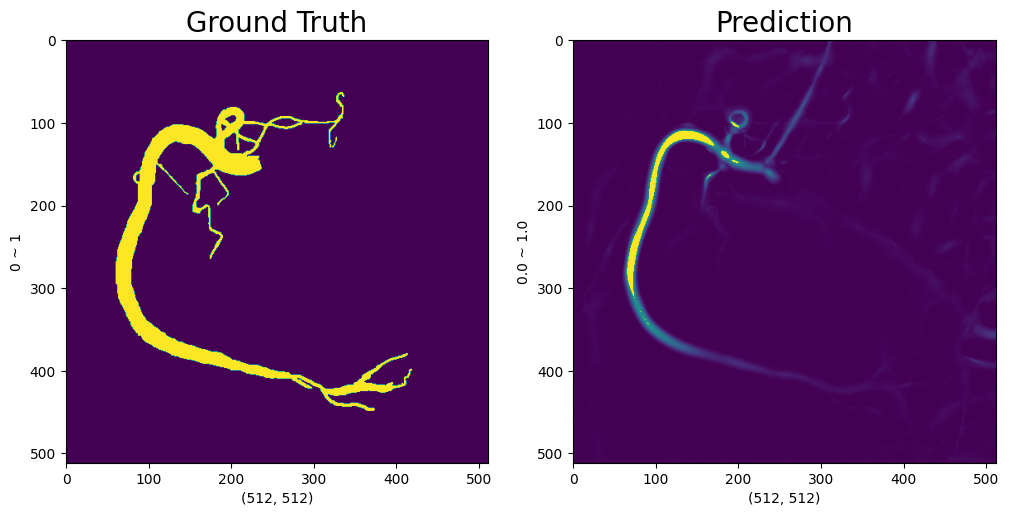

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
show(raw_mask,'Ground Truth')
plt.subplot(1,2,2)
show(pred_mask,'Prediction')

Ground Truth (512, 512) 0 1 uint16
Prediction (512, 512) 0.0 1.0 float64

Threshold = 0.1
Precision 0.8544338485147429, Recall 0.5074209087358417, F1 Score/Dice 0.6367163569532367


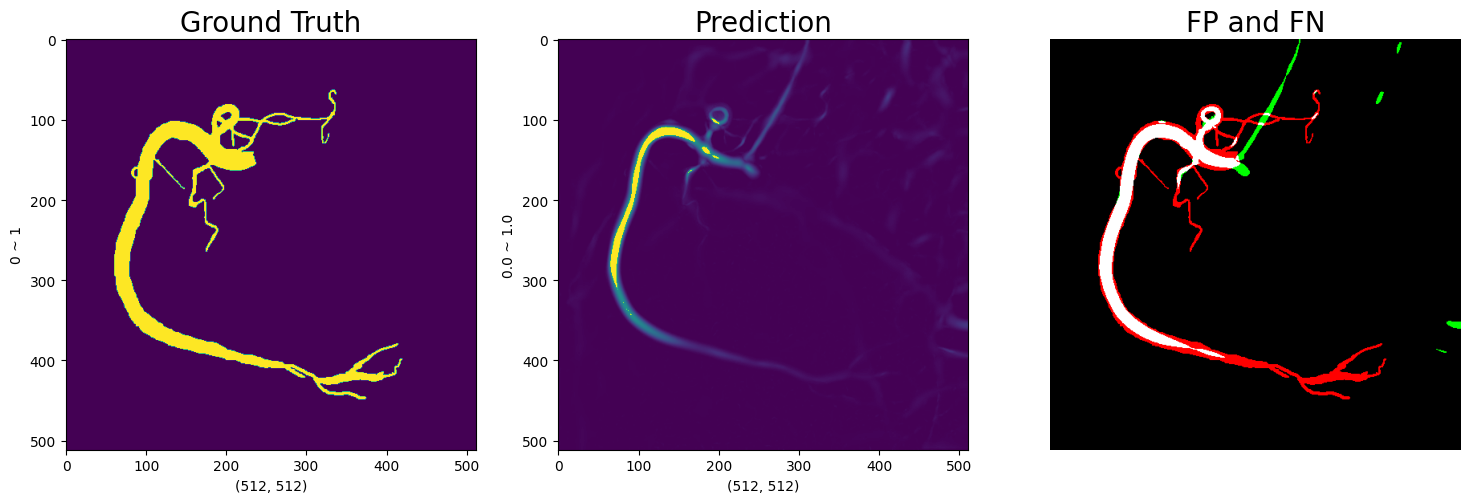

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
show(raw_mask,'Ground Truth')
plt.subplot(1,3,2)
show(pred_mask,'Prediction')
plt.subplot(1,3,3)
plt.title('FP and FN',fontsize=20)
pred_mask2 = pred_mask.copy()
threshold = 0.1
pred_mask2[pred_mask2>=threshold] = 1
pred_mask2[pred_mask2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(raw_mask,pred_mask2)
print()
print('Threshold = {}'.format(threshold))
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))

<ipython-input-20-9ace4e11c070>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,p)


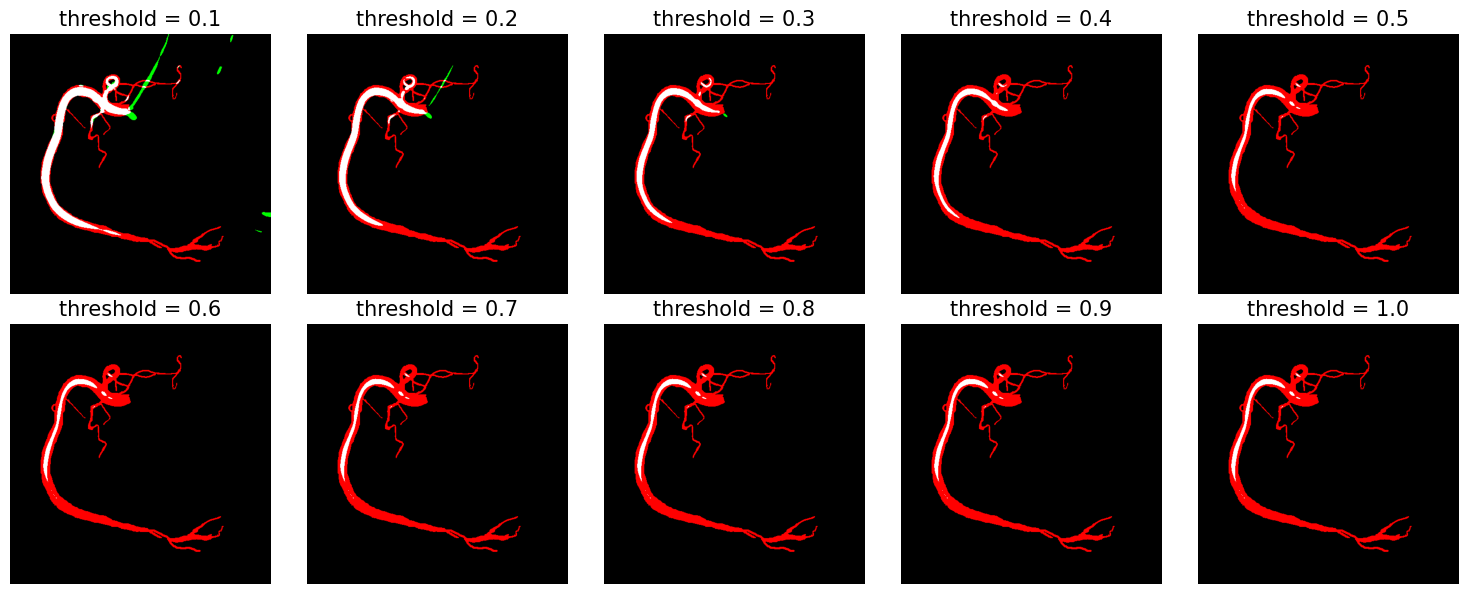

In [ ]:
plt.figure(figsize=(15,6))
# Define probability thresholds to use, between 0 and 1
th_p,th_c,th_f = [],[],[]
# Find true positive / false positive rate for each threshold
for p in range(0,12):
    y_test = pred_mask.copy()
    threshold = round(p*0.1,2)
    y_test[y_test>=threshold] = 1
    y_test[y_test<threshold] = 0
    if p != 0 and p!=11:
      plt.subplot(2,5,p)
      plt.gca().set_title('threshold = {}'.format(round(p*0.1,1)),fontsize=15)
    if p == 11:
      precision, recall,f1 = 1,0,0
    else:
      precision, recall,f1 = precision_recall_f1(raw_mask,y_test)
    th_p.append(precision)
    th_c.append(recall)
    th_f.append(f1)

plt.tight_layout()

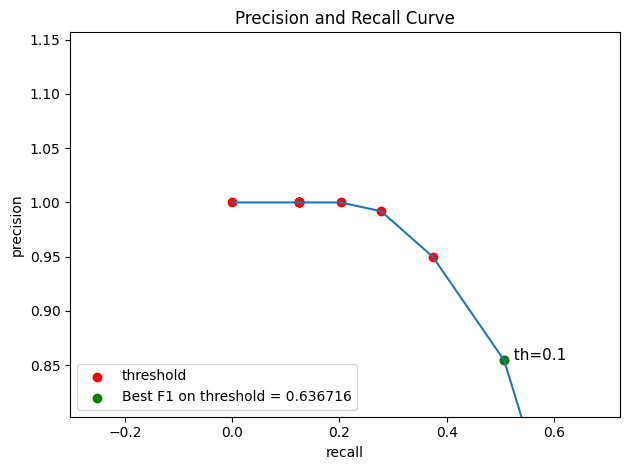

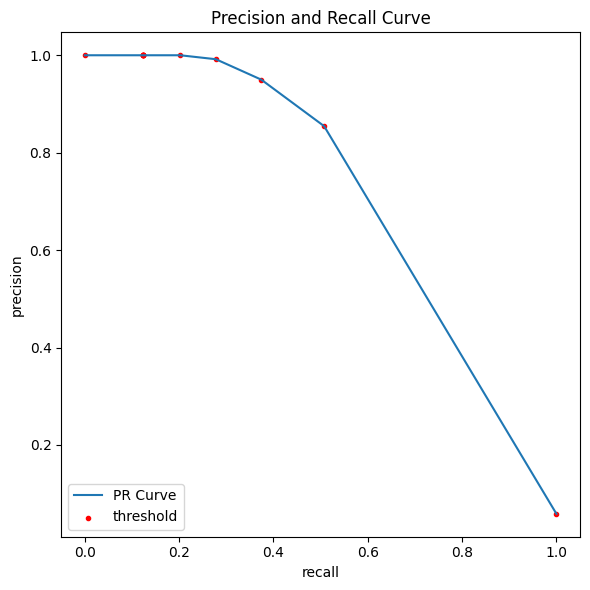

In [ ]:
plt.plot(th_c,th_p)
plt.scatter(th_c,th_p,c='r',label= 'threshold')
plt.xlim((np.mean(th_c[1:-1])-4*np.std(th_c[1:-1]),np.mean(th_c[1:-1])+4*np.std(th_c[1:-1])))
plt.ylim((np.mean(th_p[1:-1])-4*np.std(th_p[1:-1]),np.mean(th_p[1:-1])+4*np.std(th_p[1:-1])))
plt.xlabel('recall')
plt.ylabel('precision')
for i,f1 in enumerate(th_f):
  # plt.annotate('  th={}'.format(round(i*0.1,2)), (th_c[i], th_p[i]))
  if f1 == max(th_f):
      best_th = i*0.1
      plt.annotate('  th={}'.format(round(i*0.1,2)), (th_c[i], th_p[i]),fontsize=11)
      plt.scatter(th_c[i], th_p[i],c='g',label= 'Best F1 on threshold = {}'.format(round(f1,6)))
plt.legend(loc = 3)
plt.title('Precision and Recall Curve')
plt.tight_layout()


plt.figure(figsize=(6,6))
plt.plot(th_c,th_p,label= 'PR Curve')
plt.scatter(th_c,th_p,marker='.',c= 'r',label= 'threshold')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 3)
plt.title('Precision and Recall Curve')
plt.tight_layout()

F1 on best threshold = 0.1
Precision 0.8544338485147429, Recall 0.5074209087358417, F1 Score/Dice 0.6367163569532367


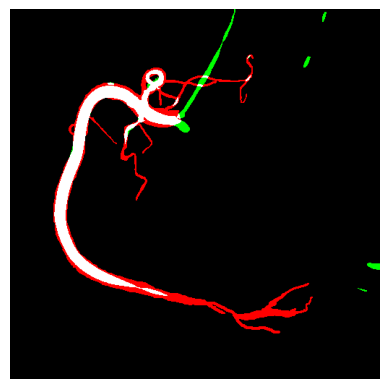

In [ ]:
pred_mask2 = pred_mask.copy()
threshold = round(best_th,2)
print('F1 on best threshold = {}'.format(threshold))
pred_mask2[pred_mask2>=threshold] = 1
pred_mask2[pred_mask2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(raw_mask,pred_mask2)
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))
